This notebook contain the analysis, preprocessing and model training/evaluation of the ***Lung Cancer Mortality Datasets v2*** ( Dataset of lung cancer with time observation durring theatment period) https://www.kaggle.com/datasets/masterdatasan/lung-cancer-mortality-datasets-v2/data

### About the Dataset

This dataset contains data on **lung cancer mortality**. It is a comprehensive collection of patient information, specifically focusing on individuals diagnosed with cancer. The dataset is designed to facilitate the analysis of various factors that may influence cancer prognosis and treatment outcomes. It includes a range of demographic, medical, and treatment-related variables, capturing essential details about each patient's condition and medical history.

#### Key Components of the Database

1.  **Demographic Information**\
    Basic details about the patients, such as age, gender, and country of residence. This helps in understanding the distribution of cancer cases across different populations and regions.

2.  **Medical History**\
    Information about each patient's medical background, including:

    -   Family history of cancer

    -   Smoking status

    -   Body Mass Index (BMI)

    -   Cholesterol levels

    -   Presence of other health conditions such as hypertension, asthma, cirrhosis, and other cancers.\
        This section is crucial for identifying potential risk factors and comorbidities.

3.  **Cancer Diagnosis**\
    Detailed data about the cancer diagnosis, including:

    -   Date of diagnosis

    -   Stage of cancer at the time of diagnosis\
        This helps in tracking the progression and severity of the disease.

4.  **Treatment Details**\
    Information regarding the type of treatment each patient received, including:

    -   Treatment type (e.g., surgery, chemotherapy, radiation, combined)

    -   End date of the treatment

    -   Outcome (whether the patient survived or not)\
        This is essential for evaluating the effectiveness of different treatment approaches.

#### Database Structure

The structure of the database allows for in-depth analysis and research, making it possible to identify patterns, correlations, and potential causal relationships between various factors and cancer outcomes. It is a valuable resource for **medical researchers**, **epidemiologists**, and **healthcare providers** aiming to improve cancer treatment and patient care.

* * * * *

### Variables in the Dataset

-   **id**: A unique identifier for each patient in the dataset.

-   **age**: The age of the patient at the time of diagnosis.

-   **gender**: The gender of the patient (e.g., male, female).

-   **country**: The country or region where the patient resides.

-   **diagnosis_date**: The date on which the patient was diagnosed with lung cancer.

-   **cancer_stage**: The stage of lung cancer at the time of diagnosis (e.g., Stage I, Stage II, Stage III, Stage IV).

-   **family_history**: Indicates whether there is a family history of cancer (e.g., yes, no).

-   **smoking_status**: The smoking status of the patient (e.g., current smoker, former smoker, never smoked, passive smoker).

-   **bmi**: The Body Mass Index of the patient at the time of diagnosis.

-   **cholesterol_level**: The cholesterol level of the patient (value).

-   **hypertension**: Indicates whether the patient has hypertension (high blood pressure) (e.g., yes, no).

-   **asthma**: Indicates whether the patient has asthma (e.g., yes, no).

-   **cirrhosis**: Indicates whether the patient has cirrhosis of the liver (e.g., yes, no).

-   **other_cancer**: Indicates whether the patient has had any other type of cancer in addition to the primary diagnosis (e.g., yes, no).

-   **treatment_type**: The type of treatment the patient received (e.g., surgery, chemotherapy, radiation, combined).

-   **end_treatment_date**: The date on which the patient completed their cancer treatment or died.

-   **survived**: Indicates whether the patient survived (e.g., yes, no). patient survived (e.g., yes, no).

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from scipy.stats import norm
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression  
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB           
from sklearn.neighbors import KNeighborsClassifier   
from sklearn.svm import SVC                          
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from joblib import dump

%matplotlib inline

In [4]:
df_large=pd.read_csv(r'C:\Users\Orjouwen\Desktop\pidev\PneumaTect\data\Lung Cancer Mortality Datasets v2\lung_cancer_mortality_data_large_v2.csv')
df_test=pd.read_csv(r'C:\Users\Orjouwen\Desktop\pidev\PneumaTect\data\Lung Cancer Mortality Datasets v2\lung_cancer_mortality_data_test_v2.csv')

In [5]:
df_large.head()

id   age  gender         country diagnosis_date cancer_stage  \
0   1  64.0  Female         Germany     2016-04-07    Stage III   
1   2  50.0    Male  Czech Republic     2023-04-22    Stage III   
2   3  65.0    Male         Romania     2023-04-07     Stage IV   
3   4  51.0  Female          Latvia     2016-02-07    Stage III   
4   5  37.0    Male          Greece     2023-12-01      Stage I   

  beginning_of_treatment_date family_history  smoking_status   bmi  \
0                  2016-04-21             No    Never Smoked  31.1   
1                  2023-05-02            Yes  Passive Smoker  25.9   
2                  2023-04-12             No    Never Smoked  18.9   
3                  2016-02-13            Yes   Former Smoker  34.6   
4                  2023-12-03            Yes    Never Smoked  40.2   

   cholesterol_level  hypertension  asthma  cirrhosis  other_cancer  \
0                257             1       1          0             0   
1                208             1       0          0             0   
2                193             0       0          0             0   
3                249             1       1          1             0   
4                262             0       0          0             0   

  treatment_type end_treatment_date  survived  
0       Combined         2017-11-15         0  
1      Radiation         2024-04-25         0  
2        Surgery         2025-03-11         0  
3        Surgery         2017-04-14         1  
4   Chemotherapy         2024-09-20         0

In [6]:
df_test.head()

id   age  gender   country diagnosis_date cancer_stage  \
0   1  64.0  Female  Slovakia     2016-04-07     Stage IV   
1   2  50.0    Male  Slovenia     2023-04-22    Stage III   
2   3  65.0    Male     Italy     2023-04-07     Stage II   
3   4  51.0    Male    Latvia     2016-02-07      Stage I   
4   5  37.0  Female     Spain     2023-12-01     Stage II   

  beginning_of_treatment_date family_history  smoking_status   bmi  \
0                  2016-04-09             No   Former Smoker  21.2   
1                  2023-05-05            Yes  Current Smoker  36.4   
2                  2023-04-12            Yes   Former Smoker  18.9   
3                  2016-03-08             No  Passive Smoker  38.8   
4                  2023-12-04            Yes   Former Smoker  37.7   

   cholesterol_level  hypertension  asthma  cirrhosis  other_cancer  \
0                191             0       0          0             0   
1                258             1       0          0             0   
2                174             1       0          1             0   
3                279             1       0          0             0   
4                273             0       0          0             0   

  treatment_type end_treatment_date  survived  
0        Surgery         2017-02-10         0  
1   Chemotherapy         2024-08-23         0  
2   Chemotherapy         2025-03-24         1  
3       Combined         2017-03-01         0  
4       Combined         2025-07-16         0

In [7]:
# Verify structure match
print("Large Dataset:", df_large.columns.tolist())
print("Test Dataset:", df_test.columns.tolist())

Large Dataset: ['id', 'age', 'gender', 'country', 'diagnosis_date', 'cancer_stage', 'beginning_of_treatment_date', 'family_history', 'smoking_status', 'bmi', 'cholesterol_level', 'hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'treatment_type', 'end_treatment_date', 'survived']
Test Dataset: ['id', 'age', 'gender', 'country', 'diagnosis_date', 'cancer_stage', 'beginning_of_treatment_date', 'family_history', 'smoking_status', 'bmi', 'cholesterol_level', 'hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'treatment_type', 'end_treatment_date', 'survived']


In [8]:
# Verify structure match
print("Large Dataset:", df_large.shape)
print("Test Dataset:", df_test.shape)

Large Dataset: (3250000, 18)
Test Dataset: (1000, 18)


In [9]:
df = pd.concat([df_large, df_test], axis=0, ignore_index=True)
print(f"Combined shape: {df.shape}")

Combined shape: (3251000, 18)


In [10]:
df.head()

id   age  gender         country diagnosis_date cancer_stage  \
0   1  64.0  Female         Germany     2016-04-07    Stage III   
1   2  50.0    Male  Czech Republic     2023-04-22    Stage III   
2   3  65.0    Male         Romania     2023-04-07     Stage IV   
3   4  51.0  Female          Latvia     2016-02-07    Stage III   
4   5  37.0    Male          Greece     2023-12-01      Stage I   

  beginning_of_treatment_date family_history  smoking_status   bmi  \
0                  2016-04-21             No    Never Smoked  31.1   
1                  2023-05-02            Yes  Passive Smoker  25.9   
2                  2023-04-12             No    Never Smoked  18.9   
3                  2016-02-13            Yes   Former Smoker  34.6   
4                  2023-12-03            Yes    Never Smoked  40.2   

   cholesterol_level  hypertension  asthma  cirrhosis  other_cancer  \
0                257             1       1          0             0   
1                208             1       0          0             0   
2                193             0       0          0             0   
3                249             1       1          1             0   
4                262             0       0          0             0   

  treatment_type end_treatment_date  survived  
0       Combined         2017-11-15         0  
1      Radiation         2024-04-25         0  
2        Surgery         2025-03-11         0  
3        Surgery         2017-04-14         1  
4   Chemotherapy         2024-09-20         0

In [11]:
df.drop("id", axis=1, inplace=True)
df.drop("country", axis=1, inplace=True)

In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3251000 entries, 0 to 3250999
Data columns (total 16 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   age                          float64
 1   gender                       object 
 2   diagnosis_date               object 
 3   cancer_stage                 object 
 4   beginning_of_treatment_date  object 
 5   family_history               object 
 6   smoking_status               object 
 7   bmi                          float64
 8   cholesterol_level            int64  
 9   hypertension                 int64  
 10  asthma                       int64  
 11  cirrhosis                    int64  
 12  other_cancer                 int64  
 13  treatment_type               object 
 14  end_treatment_date           object 
 15  survived                     int64  
dtypes: float64(2), int64(6), object(8)
memory usage: 396.9+ MB
None


In [14]:
df.duplicated().sum()

0

In [15]:
df.isnull().sum()

age                            0
gender                         0
diagnosis_date                 0
cancer_stage                   0
beginning_of_treatment_date    0
family_history                 0
smoking_status                 0
bmi                            0
cholesterol_level              0
hypertension                   0
asthma                         0
cirrhosis                      0
other_cancer                   0
treatment_type                 0
end_treatment_date             0
survived                       0
dtype: int64

In [16]:
round(df.describe().iloc[1:, ].T, 3).style.format(precision=3).background_gradient(axis=1)

In [17]:
# Convert date columns to datetime format
date_columns = ['diagnosis_date', 'beginning_of_treatment_date', 'end_treatment_date']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

In [18]:
df['treatment_duration'] = (df['end_treatment_date'] - df['beginning_of_treatment_date']).dt.days

In [19]:
print(df[['beginning_of_treatment_date', 'end_treatment_date', 'treatment_duration']].head())

  beginning_of_treatment_date end_treatment_date  treatment_duration
0                  2016-04-21         2017-11-15                 573
1                  2023-05-02         2024-04-25                 359
2                  2023-04-12         2025-03-11                 699
3                  2016-02-13         2017-04-14                 426
4                  2023-12-03         2024-09-20                 292


In [20]:
df.head()

age  gender diagnosis_date cancer_stage beginning_of_treatment_date  \
0  64.0  Female     2016-04-07    Stage III                  2016-04-21   
1  50.0    Male     2023-04-22    Stage III                  2023-05-02   
2  65.0    Male     2023-04-07     Stage IV                  2023-04-12   
3  51.0  Female     2016-02-07    Stage III                  2016-02-13   
4  37.0    Male     2023-12-01      Stage I                  2023-12-03   

  family_history  smoking_status   bmi  cholesterol_level  hypertension  \
0             No    Never Smoked  31.1                257             1   
1            Yes  Passive Smoker  25.9                208             1   
2             No    Never Smoked  18.9                193             0   
3            Yes   Former Smoker  34.6                249             1   
4            Yes    Never Smoked  40.2                262             0   

   asthma  cirrhosis  other_cancer treatment_type end_treatment_date  \
0       1          0             0       Combined         2017-11-15   
1       0          0             0      Radiation         2024-04-25   
2       0          0             0        Surgery         2025-03-11   
3       1          1             0        Surgery         2017-04-14   
4       0          0             0   Chemotherapy         2024-09-20   

   survived  treatment_duration  
0         0                 573  
1         0                 359  
2         0                 699  
3         1                 426  
4         0                 292

In [21]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3251000 entries, 0 to 3250999
Data columns (total 17 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   age                          float64       
 1   gender                       object        
 2   diagnosis_date               datetime64[ns]
 3   cancer_stage                 object        
 4   beginning_of_treatment_date  datetime64[ns]
 5   family_history               object        
 6   smoking_status               object        
 7   bmi                          float64       
 8   cholesterol_level            int64         
 9   hypertension                 int64         
 10  asthma                       int64         
 11  cirrhosis                    int64         
 12  other_cancer                 int64         
 13  treatment_type               object        
 14  end_treatment_date           datetime64[ns]
 15  survived                     int64         
 16  

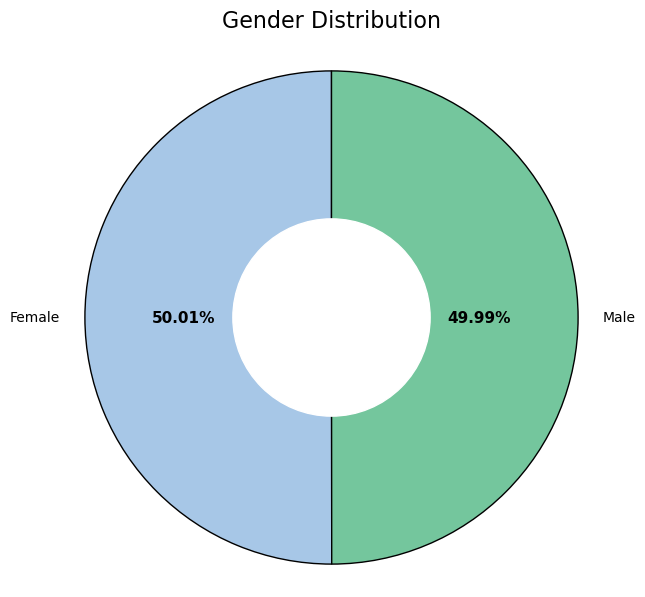

In [22]:
# Calculate gender distribution
gender_counts = df['gender'].value_counts()

# Create figure and axis
fig, ax = plt.subplots(figsize=(7, 7))

# Plot pie chart
wedges, texts, autotexts = ax.pie(
    gender_counts,
    labels=['Female', 'Male'],
    autopct='%1.2f%%',
    startangle=90,
    colors=['#A7C7E7', '#74C69D'],  # Consistent with previous palettes
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}  # Add border for clarity
)

# Add donut hole
ax.add_artist(plt.Circle((0, 0), 0.4, color='white'))

# Style labels
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(11)
    autotext.set_weight('bold')

# Title and formatting
ax.set_title('Gender Distribution', fontsize=16, pad=15)
ax.axis('equal')  # Ensure pie chart is a circle

plt.show()

Survival Count by Gender and Cancer Stage:


gender cancer_stage  survival_count
0  Female      Stage I           89257
1  Female     Stage II           89277
2  Female    Stage III           89071
3  Female     Stage IV           89458
4    Male      Stage I           89524
5    Male     Stage II           89081
6    Male    Stage III           88883
7    Male     Stage IV           89363

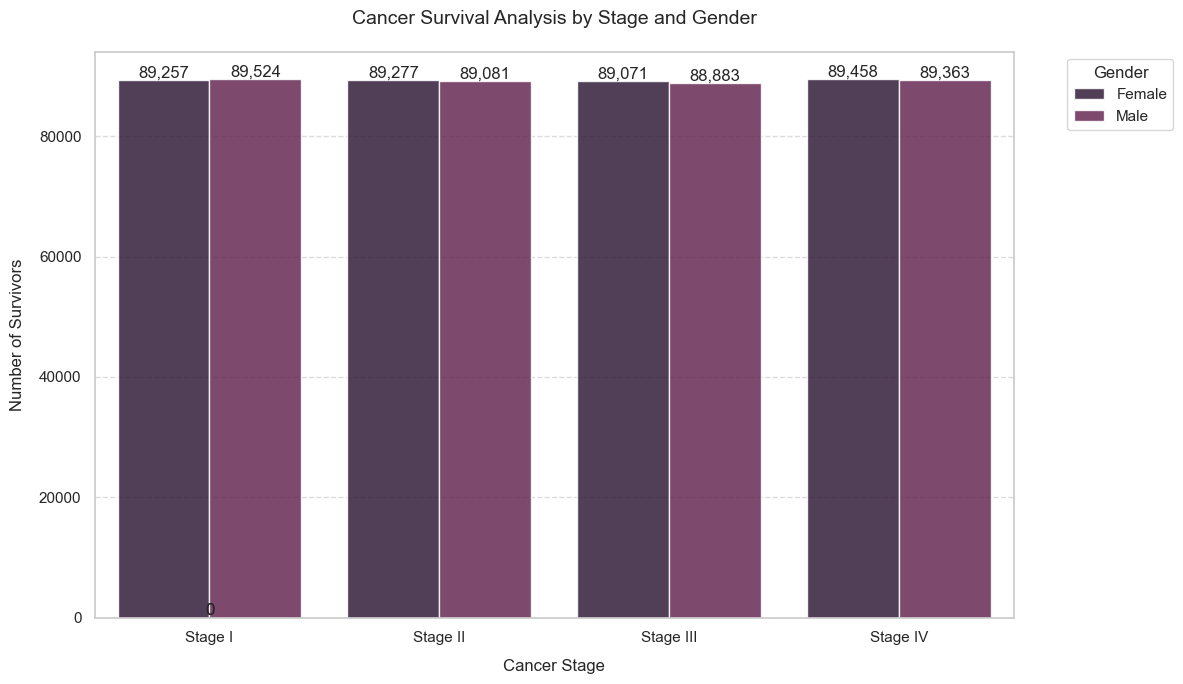

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your original data is in 'df'
# Improved aggregation with proper column naming
df_grouped = (df.groupby(["gender", "cancer_stage"])
              [["survived"]]
              .sum()
              .rename(columns={'survived': 'survival_count'})
              .reset_index())

# Display the improved table
print("Survival Count by Gender and Cancer Stage:")
display(df_grouped)

# Create a more informative visualization
plt.figure(figsize=(12, 7))
sns.set_theme(style="whitegrid", palette="rocket")

# Create bar plot with improved formatting
ax = sns.barplot(data=df_grouped, 
                 x="cancer_stage", 
                 y="survival_count", 
                 hue="gender",
                 alpha=0.85,
                 order=["Stage I", "Stage II", "Stage III", "Stage IV"])

# Add value labels on top of bars
for p in ax.patches:
    ax.annotate(f"{int(p.get_height()):,}", 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

# Improve plot aesthetics
plt.title("Cancer Survival Analysis by Stage and Gender", pad=20, fontsize=14)
plt.xlabel("Cancer Stage", labelpad=10)
plt.ylabel("Number of Survivors", labelpad=10)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Improve legend placement and formatting
plt.legend(title="Gender", frameon=True, 
           bbox_to_anchor=(1.05, 1), 
           loc='upper left')

# Add grid and adjust layout
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

In [24]:
df.family_history.value_counts()

family_history
Yes    1626412
No     1624588
Name: count, dtype: int64

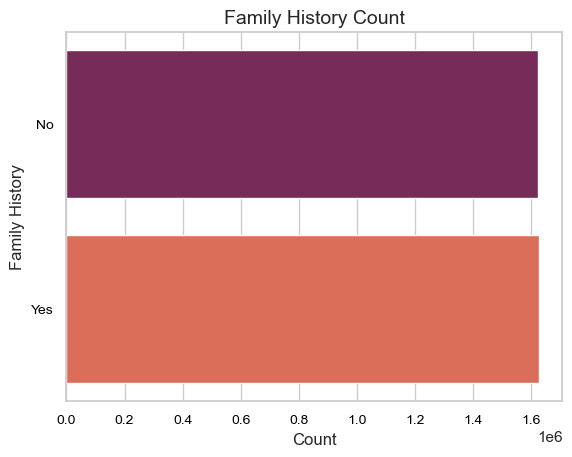

In [25]:
ax = sns.countplot(
    y=df["family_history"], 
    hue=df["family_history"], 
    palette="rocket", 
    legend=False
)

plt.title("Family History Count", fontsize=14)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Family History", fontsize=12)

plt.xticks(fontsize=10, color="black")
plt.yticks(fontsize=10, color="black")

plt.show()


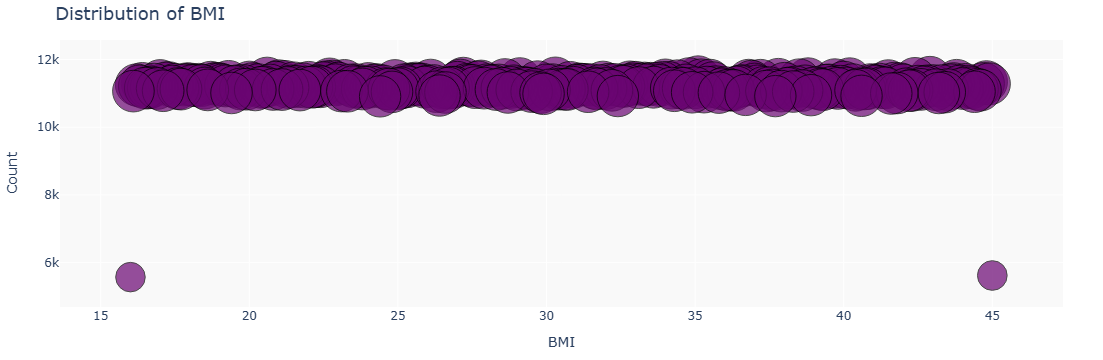

In [26]:
bmi_counts = df['bmi'].value_counts().reset_index()
bmi_counts.columns = ['bmi', 'count']

fig = px.scatter(
    bmi_counts,
    x='bmi',
    y='count',
    title="Distribution of BMI",
    labels={'bmi': 'BMI', 'count': 'Count'},
    color_discrete_sequence=["#6A0572"],  # Richer color
    size='count',
    size_max=30,  # Limit maximum bubble size for better readability
)

# Improve layout
fig.update_traces(marker=dict(opacity=0.7, line=dict(width=1, color='black')))  # Add border and adjust opacity
fig.update_layout(
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    plot_bgcolor="#F9F9F9",  # Light background for contrast
    margin=dict(l=40, r=40, t=40, b=40)  # Adjust margins for better spacing
)

fig.show()


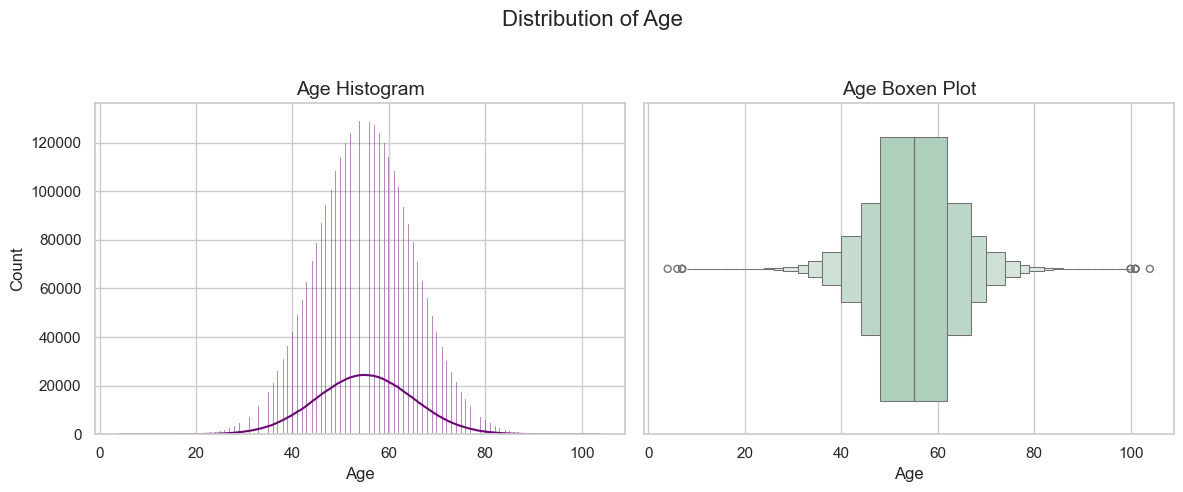

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plt.suptitle("Distribution of Age", fontsize=16)

# Histogram with KDE
sns.histplot(df['age'], kde=True, ax=axes[0], color="#6A0572")  # Richer color
axes[0].set_xlabel("Age", fontsize=12)
axes[0].set_ylabel("Count", fontsize=12)
axes[0].set_title("Age Histogram", fontsize=14)

# Boxen plot (explicit x assignment)
sns.boxenplot(x=df['age'], ax=axes[1], color="#A8D5BA")  # Complementary color
axes[1].set_xlabel("Age", fontsize=12)
axes[1].set_title("Age Boxen Plot", fontsize=14)

# Clean layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Prevent overlap with suptitle
plt.show()

C:\Users\Orjouwen\AppData\Local\Temp\ipykernel_14680\1176543604.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



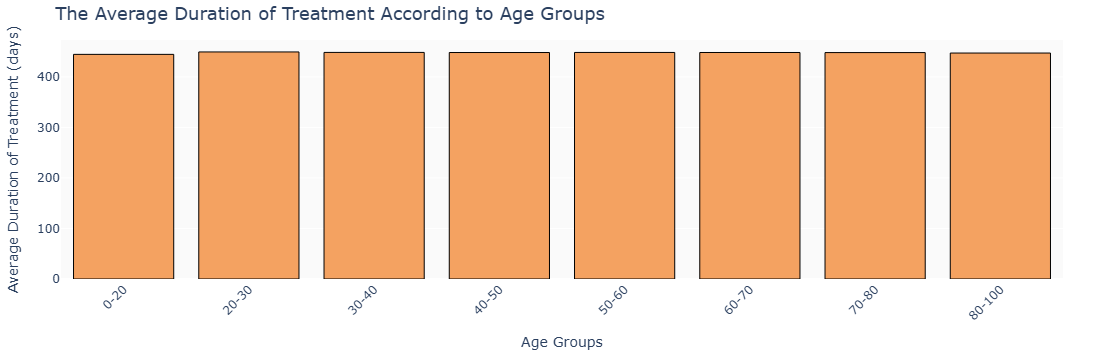

In [28]:
age_labels = ["0-20", "20-30", "30-40", "40-50", "50-60", "60-70", "70-80", "80-100"]
age_bins = [0, 20, 30, 40, 50, 60, 70, 80, 100]

df["age_group"] = pd.cut(df["age"], bins=age_bins, labels=age_labels, right=False)
avg_treatment_by_age = df.groupby("age_group")["treatment_duration"].mean().reset_index()

fig1 = px.bar(
    avg_treatment_by_age, 
    x="age_group", 
    y="treatment_duration",
    title="The Average Duration of Treatment According to Age Groups",
    labels={"age_group": "Age Groups", "treatment_duration": "Average Duration of Treatment (days)"},
    color_discrete_sequence=["#F4A261"]  # Warm orange tone
)

# Improve layout
fig1.update_traces(marker=dict(line=dict(color='black', width=1)))  # Add border for clarity
fig1.update_layout(
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    plot_bgcolor="#FAFAFA",  # Light background for contrast
    margin=dict(l=40, r=40, t=40, b=40),  # Adjust margins for better spacing
    xaxis_tickangle=-45  # Rotate x-axis labels for better readability
)

fig1.show()

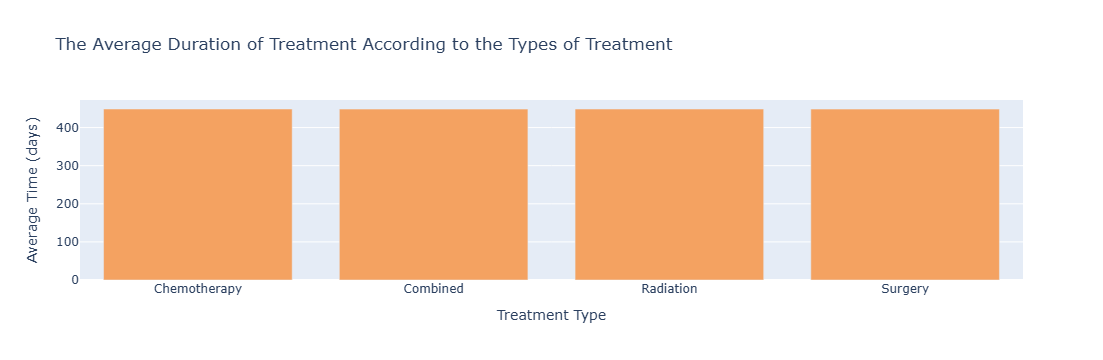

In [29]:
avg_treatment_by_type = df.groupby("treatment_type")["treatment_duration"].mean().reset_index()
fig2 = px.bar(
    avg_treatment_by_type, 
    x="treatment_type", 
    y="treatment_duration",
    title="The Average Duration of Treatment According to the Types of Treatment",
    labels={"treatment_type": "Treatment Type", "treatment_duration": "Average Time (days)"},
    color_discrete_sequence=["#F4A261"] 
)
fig2.show()

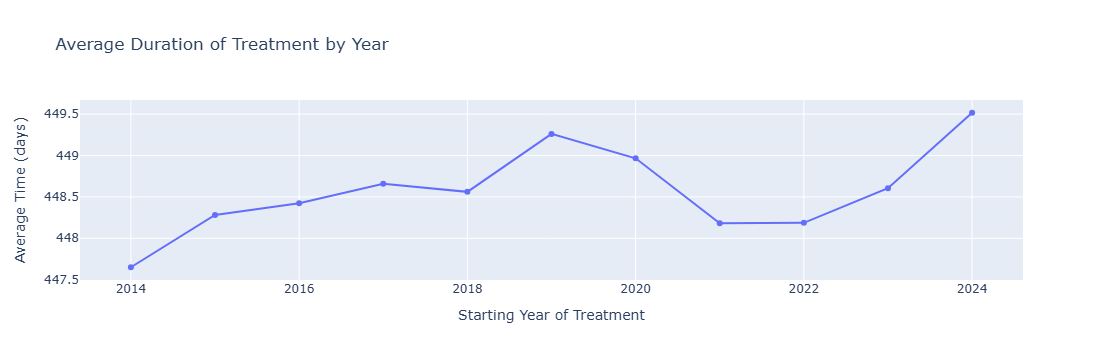

In [30]:
df["treatment_year"] = df["beginning_of_treatment_date"].dt.year
avg_treatment_by_year = df.groupby("treatment_year")["treatment_duration"].mean().reset_index()
fig3 = px.line(
    avg_treatment_by_year, 
    x="treatment_year", 
    y="treatment_duration",
    title="Average Duration of Treatment by Year",
    labels={"treatment_year": "Starting Year of Treatment", "treatment_duration": "Average Time (days)"},
    markers=True
)
fig3.show()

In [31]:
df.smoking_status.value_counts()

smoking_status
Passive Smoker    814523
Former Smoker     812517
Current Smoker    812091
Never Smoked      811869
Name: count, dtype: int64

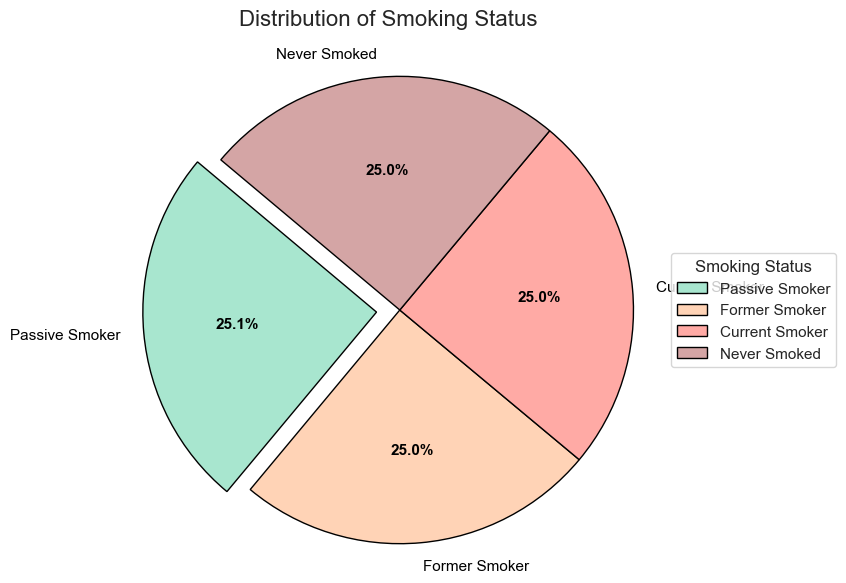

In [32]:
fig, ax = plt.subplots(figsize=(8, 6))
values = df['smoking_status'].value_counts()
labels = values.index
explode = [0.1] + [0] * (len(values) - 1)

# Create pie chart
wedges, texts, autotexts = ax.pie(
    values, 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=140, 
    explode=explode, 
    colors=["#A8E6CF", "#FFD3B6", "#FFAAA5", "#D4A5A5"],
    wedgeprops={'edgecolor': 'black', 'linewidth': 1},  # Add border to slices
    textprops={'fontsize': 11, 'color': 'black'}
)

# Style percentage labels
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(11)
    autotext.set_weight('bold')

# Title and formatting
ax.set_title("Distribution of Smoking Status", fontsize=16, pad=20)
ax.axis('equal')  # Ensure pie is drawn as a circle

# Add a legend
ax.legend(wedges, labels, title="Smoking Status", loc="center left", bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

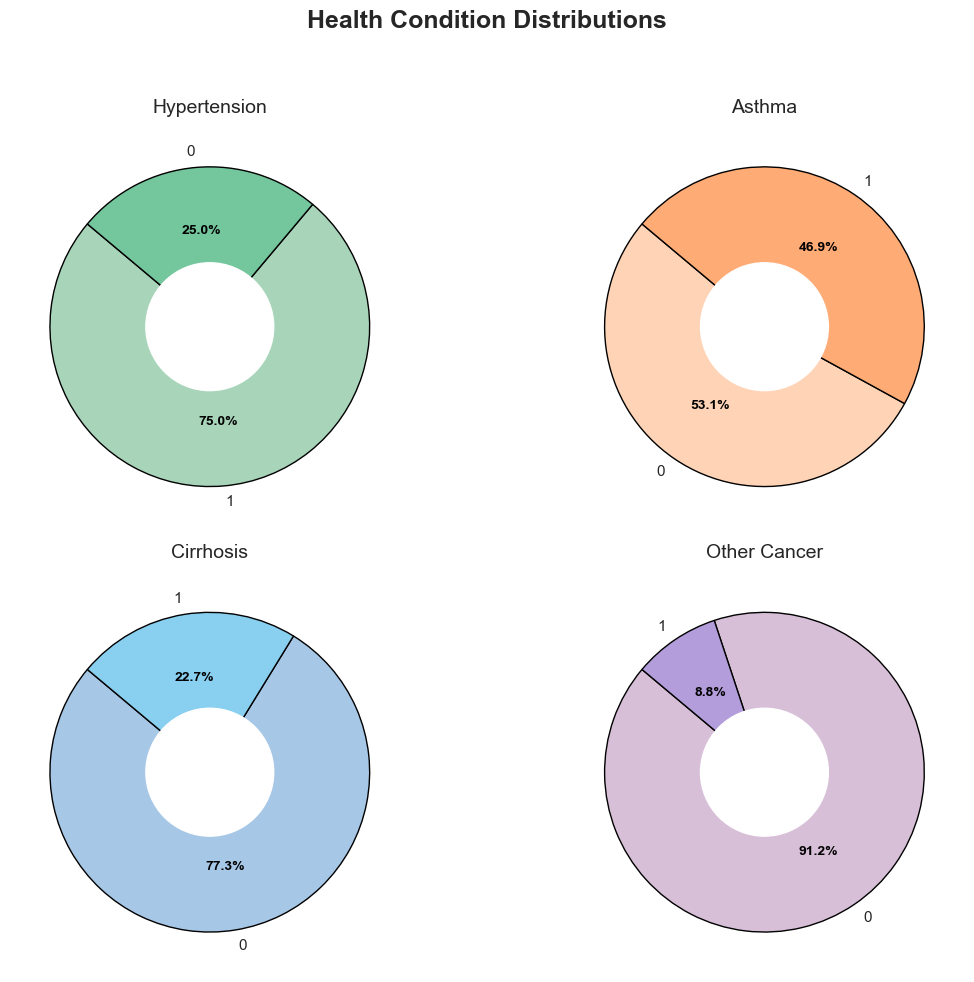

In [33]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Health Condition Distributions", fontsize=18, weight='bold')

# Custom function to create a donut chart
def plot_donut(ax, data, title, colors):
    labels = data.index
    sizes = data.values
    
    wedges, texts, autotexts = ax.pie(
        sizes, 
        labels=labels, 
        autopct="%1.1f%%", 
        colors=colors, 
        startangle=140, 
        wedgeprops={'edgecolor': 'black', 'linewidth': 1}  # Add border
    )
    
    # Add donut hole
    ax.add_artist(plt.Circle((0, 0), 0.4, color='white'))  
    
    # Style percentage labels
    for autotext in autotexts:
        autotext.set_color('black')
        autotext.set_fontsize(10)
        autotext.set_weight('bold')

    ax.set_title(title, fontsize=14, pad=10)

# Plot each donut chart
plot_donut(axes[0, 0], df.hypertension.value_counts(), "Hypertension", ["#A8D5BA", "#74C69D"])
plot_donut(axes[0, 1], df.asthma.value_counts(), "Asthma", ["#FFD3B6", "#FFAB76"])
plot_donut(axes[1, 0], df.cirrhosis.value_counts(), "Cirrhosis", ["#A7C7E7", "#89CFF0"])
plot_donut(axes[1, 1], df.other_cancer.value_counts(), "Other Cancer", ["#D8BFD8", "#B39DDB"])

# Clean up layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Prevent overlap with the title
plt.show()

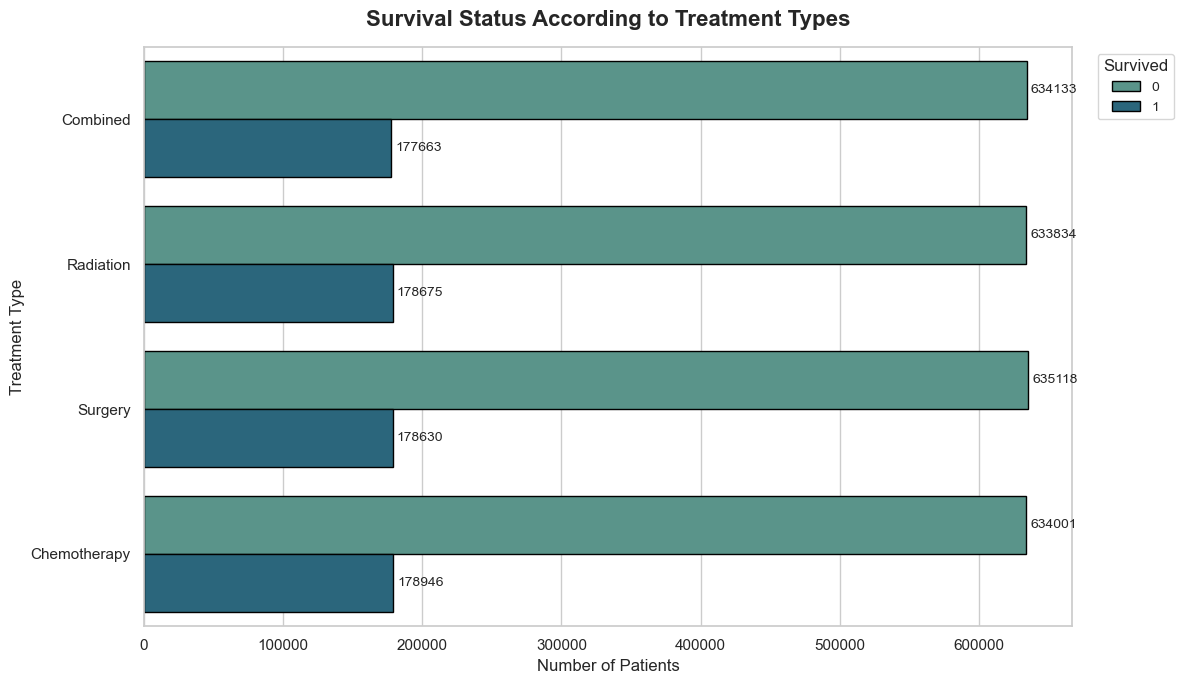

In [34]:
plt.figure(figsize=(12, 7))

# Use 'crest' for better contrast
ax = sns.countplot(
    y=df['treatment_type'],
    hue=df['survived'],
    palette="crest",  
    edgecolor="black"  # Add border for better definition
)

# Add value annotations on the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)

# Title and axis labels
plt.title("Survival Status According to Treatment Types", fontsize=16, weight='bold', pad=15)
plt.xlabel("Number of Patients", fontsize=12)
plt.ylabel("Treatment Type", fontsize=12)

# Adjust legend position and title
plt.legend(
    title="Survived", 
    bbox_to_anchor=(1.02, 1), 
    loc="upper left", 
    fontsize=10,
    title_fontsize=12
)

# Clean up layout
plt.tight_layout()
plt.show()

In [35]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3251000 entries, 0 to 3250999
Data columns (total 19 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   age                          float64       
 1   gender                       object        
 2   diagnosis_date               datetime64[ns]
 3   cancer_stage                 object        
 4   beginning_of_treatment_date  datetime64[ns]
 5   family_history               object        
 6   smoking_status               object        
 7   bmi                          float64       
 8   cholesterol_level            int64         
 9   hypertension                 int64         
 10  asthma                       int64         
 11  cirrhosis                    int64         
 12  other_cancer                 int64         
 13  treatment_type               object        
 14  end_treatment_date           datetime64[ns]
 15  survived                     int64         
 16  

In [36]:
df.drop("age_group", axis=1, inplace=True)
df.drop("treatment_year", axis=1, inplace=True)

df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})

stage_order = {'Stage I': 1, 'Stage II': 2, 'Stage III': 3, 'Stage IV': 4}
df['cancer_stage'] = df['cancer_stage'].map(stage_order)

df['family_history'] = df['family_history'].map({'No': 0, 'Yes': 1})

df = pd.get_dummies(df, columns=['smoking_status'], prefix='smoke', dtype=int)

df = pd.get_dummies(df, columns=['treatment_type'], prefix='treatment', dtype=int)


In [42]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3251000 entries, 0 to 3250999
Data columns (total 23 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   age                          float64       
 1   gender                       int64         
 2   diagnosis_date               datetime64[ns]
 3   cancer_stage                 int64         
 4   beginning_of_treatment_date  datetime64[ns]
 5   family_history               int64         
 6   bmi                          float64       
 7   cholesterol_level            int64         
 8   hypertension                 int64         
 9   asthma                       int64         
 10  cirrhosis                    int64         
 11  other_cancer                 int64         
 12  end_treatment_date           datetime64[ns]
 13  survived                     int64         
 14  treatment_duration           int64         
 15  smoke_Current Smoker         int32         
 16  

In [45]:
df.rename(columns=str.lower, inplace=True)
df.rename(columns={col: col.replace(" ", "_") for col in df.columns}, inplace=True)

In [47]:
df.head()

age  gender diagnosis_date  cancer_stage beginning_of_treatment_date  \
0  64.0       0     2016-04-07             3                  2016-04-21   
1  50.0       1     2023-04-22             3                  2023-05-02   
2  65.0       1     2023-04-07             4                  2023-04-12   
3  51.0       0     2016-02-07             3                  2016-02-13   
4  37.0       1     2023-12-01             1                  2023-12-03   

   family_history   bmi  cholesterol_level  hypertension  asthma  ...  \
0               0  31.1                257             1       1  ...   
1               1  25.9                208             1       0  ...   
2               0  18.9                193             0       0  ...   
3               1  34.6                249             1       1  ...   
4               1  40.2                262             0       0  ...   

   survived  treatment_duration smoke_current_smoker  smoke_former_smoker  \
0         0                 573                    0                    0   
1         0                 359                    0                    0   
2         0                 699                    0                    0   
3         1                 426                    0                    1   
4         0                 292                    0                    0   

   smoke_never_smoked  smoke_passive_smoker  treatment_chemotherapy  \
0                   1                     0                       0   
1                   0                     1                       0   
2                   1                     0                       0   
3                   0                     0                       0   
4                   1                     0                       1   

   treatment_combined  treatment_radiation  treatment_surgery  
0                   1                    0                  0  
1                   0                    1                  0  
2                   0                    0                  1  
3                   0                    0                  1  
4                   0                    0                  0  

[5 rows x 23 columns]

In [48]:
round(df.describe().iloc[1:, ].T, 3).style.format(precision=3).background_gradient(axis=1)

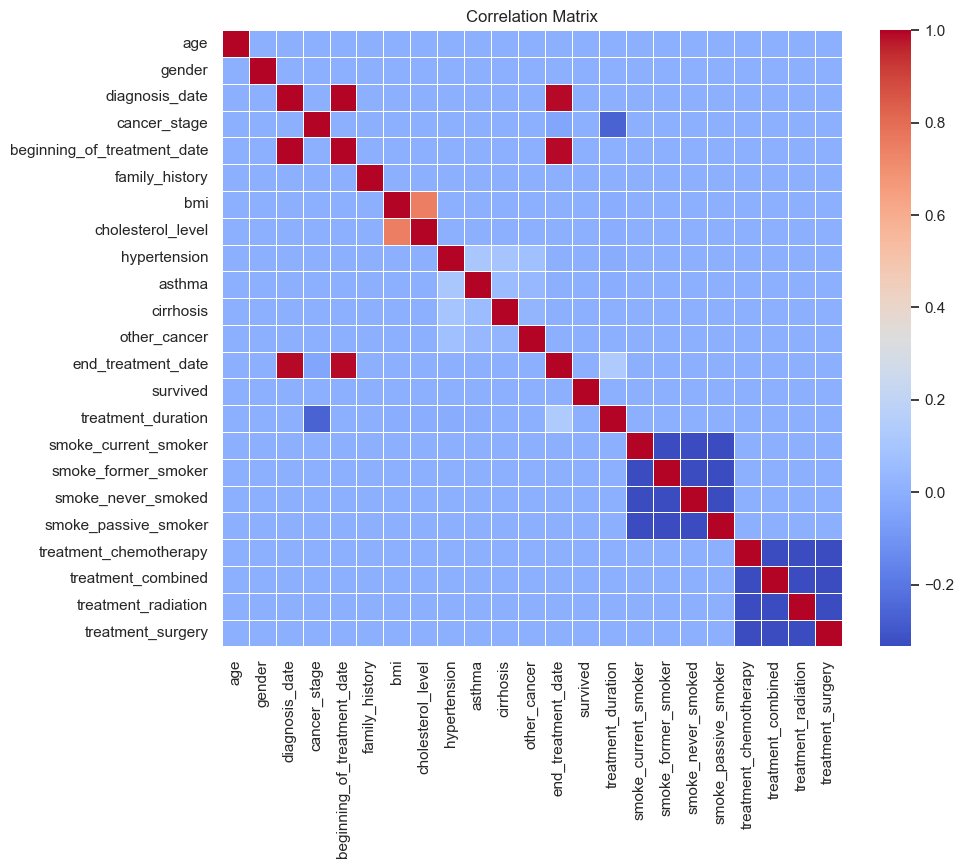

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap to visualize the correlation matrix without numbers
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


# 1. Cancer Stage Prediction Model
# 2. Treatment Type Prediction Model
# 3. Survival Prediction Model

In [80]:
# 2. Cancer Stage Prediction Model
X_cancer = df.drop(columns=['cancer_stage', 'survived'])  # Dropping cancer_stage and survived (target)
y_cancer = df['cancer_stage']

datetime_columns = X_cancer.select_dtypes(include=['datetime64']).columns
for col in datetime_columns:
    X_cancer[col] = pd.to_numeric(X_cancer[col])
    
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(X_cancer, y_cancer, test_size=0.3, random_state=42)

print(f'Shapes - X Training: {X_train_cancer.shape} and X Testing {X_test_cancer.shape}')
print(f'Shapes - Y Training: {y_train_cancer.shape} and Y Testing {y_test_cancer.shape}')

print(f'\nTraining output counts\n{y_test_cancer.value_counts()}')


model_cancer = RandomForestClassifier(random_state=42)
model_cancer.fit(X_train_cancer, y_train_cancer)

# Evaluate the Cancer Stage model
y_pred_cancer = model_cancer.predict(X_test_cancer)
print("Cancer Stage Prediction Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test_cancer, y_pred_cancer)}")
print(f"Classification Report:\n{classification_report(y_test_cancer, y_pred_cancer)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test_cancer, y_pred_cancer)}")
print("-" * 50)

Shapes - X Training: (2275700, 21) and X Testing (975300, 21)
Shapes - Y Training: (2275700,) and Y Testing (975300,)

Training output counts
cancer_stage
1    243995
3    243779
4    243778
2    243748
Name: count, dtype: int64
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Orjouwen\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 2168, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Orjouwen\anaconda3\Lib\site-packages\IPython\core\ultratb.py", line 1454, in structured_traceback
    return FormattedTB.structured_traceback(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Orjouwen\anaconda3\Lib\site-packages\IPython\core\ultratb.py", line 1345, in structured_traceback
    return VerboseTB.structured_traceback(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Orjouwen\anaconda3\Lib\site-packages\IPython\core\ultratb.py", line 1192, in structured_traceback
    formatted_exception = self.format_exception_as_a_whole(etype, evalue, etb, number_of_lines_of_context,
                          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\

In [ ]:
# Save the model to a file
dump(knn_model, 'lcp_model.joblib') 

In [1]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

if len(tf.config.list_physical_devices('GPU')) > 0:
    print("GPU is available.")
    device_name = tf.test.gpu_device_name()
    if device_name != '/device:GPU:0':
        raise SystemError('GPU device not found')
    print('Found GPU at: {}'.format(device_name))
else:
    print("GPU is not available.")

#Optional, check if the GPU is being used for a simple calculation.
with tf.device('/GPU:0'):
    a = tf.random.uniform([1000, 1000])
    b = tf.random.uniform([1000, 1000])
    c = tf.matmul(a, b)
print("Matrix multiplication done on GPU.")

Num GPUs Available:  0
GPU is not available.
Matrix multiplication done on GPU.
